In [1]:
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os
sys.path.append("../scripts")
import stock_eda
import news_eda
import technical_indicators as ti
import sentiment_analyzer as san

In [2]:
# Load news and stock data
news_data = news_eda.load_data("../data/raw_analyst_ratings.csv")
stock_data = stock_eda.load_data("../data/NVDA_historical_data.csv")

In [3]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [5]:
# Convert 'date' column in news data and 'Date' column in stock data to datetime
news_data = news_eda.convert_date(news_data)
stock_data = stock_eda.convert_date(stock_data)

In [6]:
news_data = news_data[news_data['stock'] == 'NVDA']
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
924271,929039,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10 12:37:10,NVDA
924272,929040,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25,NVDA
924273,929041,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11,NVDA
924274,929042,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09 13:40:43,NVDA
924275,929043,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08 12:30:29,NVDA


In [7]:
# Filter stock data to match the date range of news data
start_date = news_data['date'].min()
end_date = news_data['date'].max()
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]

In [8]:
# Sentiment analysis
san.sentiment_category(news_data)

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_class,sentiment_score
924271,929039,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10 12:37:10,NVDA,Positive,0.7296
924272,929040,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25,NVDA,Neutral,0.0000
924273,929041,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11,NVDA,Neutral,0.0000
924274,929042,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09 13:40:43,NVDA,Positive,0.7296
924275,929043,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08 12:30:29,NVDA,Neutral,0.0000
...,...,...,...,...,...,...,...,...
927412,932184,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,https://www.benzinga.com/analyst-ratings/analy...,Mark Page,2011-03-08 00:00:00,NVDA,Positive,0.2023
927413,932185,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",https://www.benzinga.com/analyst-ratings/upgra...,Joe Young,2011-03-08 00:00:00,NVDA,Positive,0.2023
927414,932186,Goldman Sachs Gives Color On Semiconductors (N...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Staff,2011-03-07 00:00:00,NVDA,Neutral,0.0000
927415,932187,Auriga Still Not Sure Where Reality Lies For N...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffB,2011-03-07 00:00:00,NVDA,Negative,-0.5806


In [9]:
# Calculate daily returns for stock
stock_data['daily_return'] = stock_data['Close'].pct_change()

# Rename columns to avoid conflicts
news_data.rename(columns={'date': 'Date'}, inplace=True)

In [10]:
# Merge news data with stock data on Date
combined_data = pd.merge(stock_data, news_data, on='Date', how='left')


In [11]:
# Aggregate sentiment scores by date
daily_sentiment = combined_data.groupby('Date')['sentiment_score'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment_score': 'average_sentiment_score'}, inplace=True)

In [12]:
# Merge aggregated sentiment with combined data
final_data = pd.merge(combined_data, daily_sentiment, on='Date', how='left')
final_data = final_data[['Date', 'average_sentiment_score', 'Close', 'daily_return']]
final_data.head()

,Date,average_sentiment_score,Close,daily_return
0,2011-03-03,-0.57190,0.52175,NaN
1,2011-03-04,NaN,0.51900,-0.005271
2,2011-03-07,-0.29030,0.51175,-0.013969
3,2011-03-07,-0.29030,0.51175,-0.013969
4,2011-03-08,0.03255,0.48875,-0.044944


In [13]:
# Calculate correlation between sentiment and daily return
correlation_return = final_data[['average_sentiment_score', 'daily_return']].corr().iloc[0, 1]
print(f"Correlation between sentiment and daily return: {correlation_return}")

Correlation between sentiment and daily return: 0.18620331306794802


In [14]:
# Calculate correlation between sentiment and closing price
correlation_close = final_data[['average_sentiment_score', 'Close']].corr().iloc[0, 1]
print(f"Correlation between sentiment and closing price: {correlation_close}")

Correlation between sentiment and closing price: 0.03972811057828407


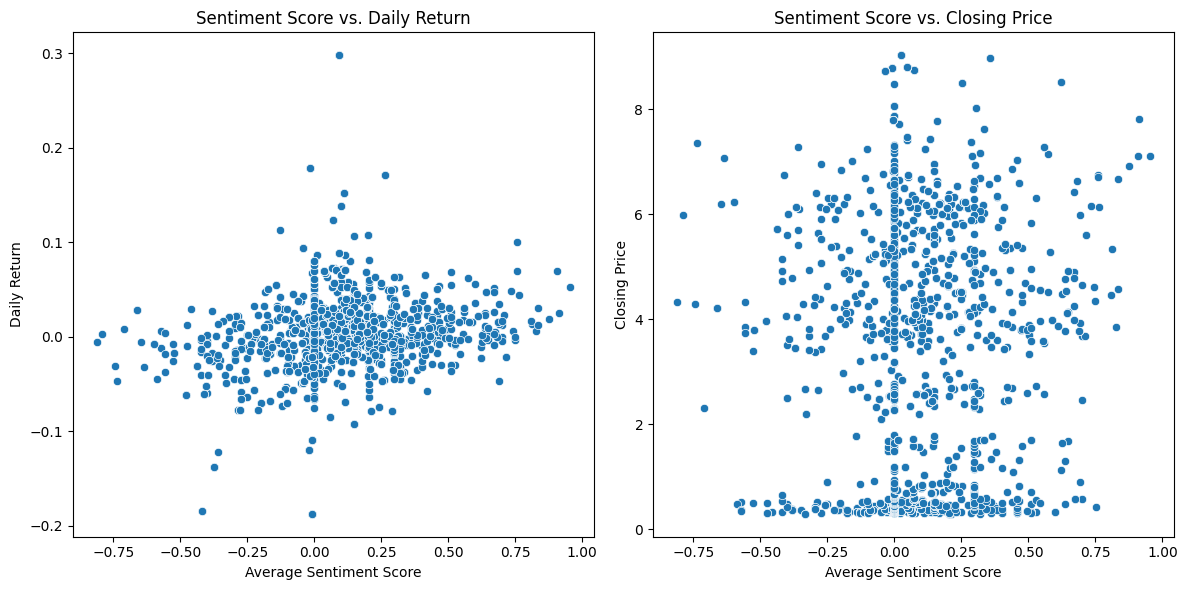

In [15]:
san.plot_scatter(final_data)

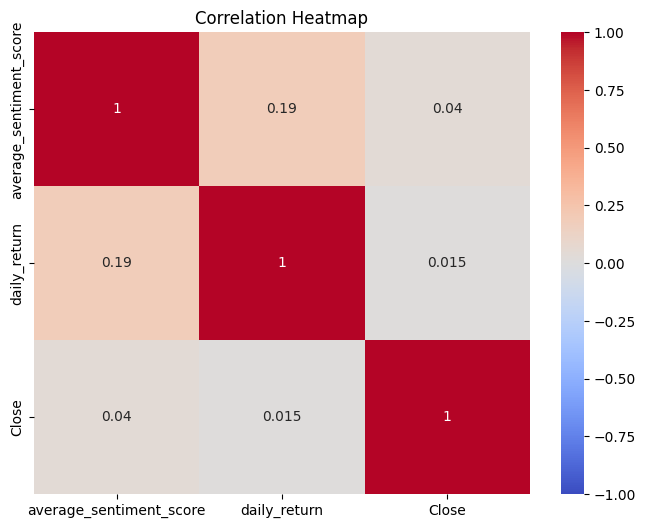

In [16]:
san.plot_heatmap(final_data)